In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

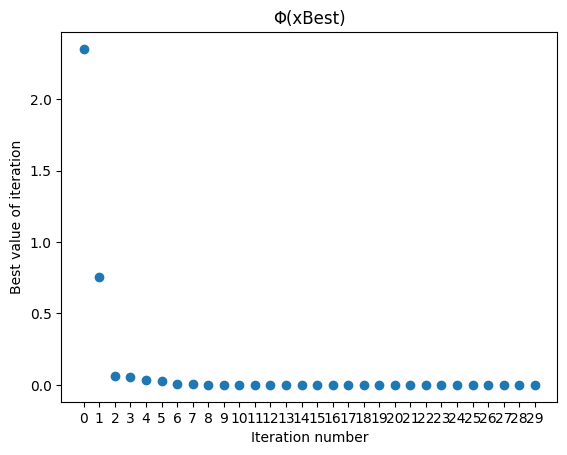

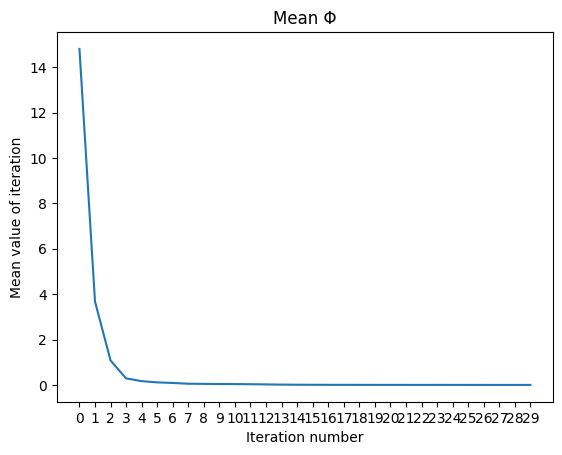

{'best fitness': 1.5189636329993253e-07, 'best solution': [-0.00038946085904322057, 1.4717424137708273e-05]}


In [116]:
def obj(x):
    y = 0
    # Sphere function
    # x ∈ <-∞,∞> 
    
    for i in range(len(x)):
        y += x[i] ** 2
    

    # Rastrigin function
    # x ∈ <-1,1>
    # fmin(0,0,...,0)=-n
    """
    for i in range(len(x)):
        y+=x[i]**2-math.cos(18*x[i])
    """

    # Ackley function
    # x ∈ <-5,5> 
    # fmin(0,0,...,0)=0
    """
    sum=0
    for i in range(len(x)):
        sum+=math.cos(2*math.pi*x[i])

    y+=-20*math.exp(-0.2*math.sqrt((1/len(x))*(np.sum(np.square(x)))))-math.exp((1/len(x))*sum)+math.e+20
    """

    # Rosenbrock function   
    # x ∈ <-∞,∞> 
    # fmin(1,1,...,1)=0
    """
    for i in range(len(x)-1):
        y+=(1-x[i])**2 + 100*(x[i+1]-x[i]**2)**2
    """
    return y


def boundary_check(x, lower_bound, upper_bound, dim):
    for i in range(dim):
        if x[i] < lower_bound:
            x[i] = lower_bound
        elif x[i] > upper_bound:
            x[i] = upper_bound
    return x


def main(initial_population_size, max_population_size, iter, min_seeds, max_seeds, initial_sigma, final_sigma, lower_bound, upper_bound,dim):
    """
    initial_population_size - initial population size
    max_population_size - maximum population size
    iter - maximum number of iterations
    min_seeds - minimum number of seeds
    max_seeds - maximum number of seeds
    initial_sigma - initial value of standard deviation
    final_sigma - final value of standard deviation
    lower_bound - lower bound 
    upper_bound - upper bound 
    dim - dimension of seed
    """
    # Initialization
    pos = []  # the position of weeds
    score = []  # the score of weeds
    mean_values=[] # the mean values of iterations

    # initialize offspring population
    for _ in range(initial_population_size):
        pos.append([random.uniform(lower_bound, upper_bound) for i in range(dim)]) 
        score.append(obj(pos[-1]))

    gbest = min(score)  # the global best
    gbest_pos = pos[score.index(gbest)].copy()  # the global best individual
    iter_best = []  # the global best of each iteration
    

    # The main loop
    for t in range(iter):

        # Update standard deviation
        sigma = ((iter-t)/(iter))**2*(initial_sigma - final_sigma) + final_sigma

        # Reproduction and spatial dispersion
        new_pos = []
        new_score = []
        min_score = min(score)
        max_score = max(score)

        if min_score == 0 and max_score == 0:
            break

        for i in range(len(pos)):
            ratio = (score[i] - max_score) / (min_score - max_score)
            snum = math.floor(min_seeds + (max_seeds - min_seeds) * ratio)  # the number of seeds

            for _ in range(snum):
                temp_pos = [pos[i][j] + random.gauss(0, sigma) for j in range(dim)]
                temp_pos = boundary_check(temp_pos, lower_bound, upper_bound, dim)
                new_pos.append(temp_pos)
                new_score.append(obj(temp_pos))

        # Competitive exclusion
        new_pos.extend(pos)
        new_score.extend(score)

        if len(new_pos) > max_population_size:
            pos = []
            score = []
            sorted_index = np.argsort(new_score)
            for i in range(max_population_size):
                pos.append(new_pos[sorted_index[i]])
                score.append(new_score[sorted_index[i]])
        else:
            pos = new_pos
            score = new_score

        # Update the global best
        if min(score) < gbest:
            gbest = min(score)
            gbest_pos = pos[score.index(gbest)]
           
        iter_best.append(gbest)
        mean_values.append(sum(score)/len(score))

    # Results
    # best value of iteration
    x = [i for i in range(len(iter_best))]
    plt.figure()
    plt.scatter(x, iter_best)
    plt.xlabel('Iteration number')
    plt.ylabel('Best value of iteration')
    plt.title('Φ(xBest)')
    plt.xticks(x)
    plt.show()

    # mean value of iteration
    plt.figure()
    plt.plot(x, mean_values)
    plt.xlabel('Iteration number')
    plt.ylabel('Mean value of iteration')
    plt.title('Mean Φ')
    plt.xticks(x)
    plt.show()
    return {'best fitness': gbest, 'best solution': gbest_pos}


print(main(10,30,30,0,5,1,1e-6,-5,5,2))
